# 3. Cluster analysis

# Import code

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from sklearn.cluster import AgglomerativeClustering

In [3]:
import prepostprocessing.pre_processing as preproc

In [4]:
area1_int_df = preproc.load_obj("area1_int_df")

area2_int_df = preproc.load_obj("area2_int_df")

area3_int_df = preproc.load_obj("area3_int_df")

area4_int_df = preproc.load_obj("area4_int_df")

area5_int_df = preproc.load_obj("area5_int_df")



pca_df = preproc.load_obj("mineralogy_pca_df1")
metadata = preproc.load_obj("metadata")


# Idividual areas

## Area1

In [5]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [6]:
area1_int_df = area1_int_df.iloc[:, 0: 2]

In [7]:
area1_int_df

,PC01,PC02
2809,-0.871616,-0.061954
2810,-0.867083,-0.061057
2811,-0.863637,-0.060284
2812,-0.881656,-0.001032
2813,-0.881230,-0.000526
...,...,...
205097,-0.049269,-0.211667
205541,-0.047306,-0.221904
205542,-0.047587,-0.220724
205543,-0.047827,-0.219399


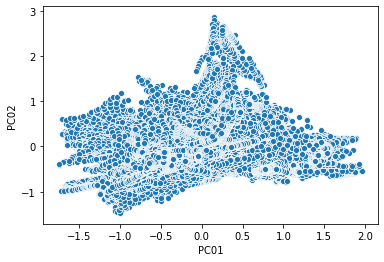

In [8]:
sns.scatterplot(x="PC01", y="PC02", data=area1_int_df)
plt.show();

In [15]:
%%time
X = area1_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

MemoryError: Unable to allocate 56.1 GiB for an array with shape (7529301541,) and data type float64

In [ ]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.show();

In [60]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [61]:
cluster_groups

,0
0,0
1,2
2,0
3,0
4,0
...,...
4654,3
4655,3
4656,3
4657,3


In [70]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [71]:
clustering = pd.concat([area_numbers, cluster_groups], axis = 1)
clustering = clustering.dropna()

In [72]:
clustering

,time,area,0
1,K,2.0,2.0
2,Tr,1.0,0.0
3,K,3.0,0.0
4,K,3.0,0.0
5,K,4.0,2.0
...,...,...,...
4653,K,3.0,3.0
4654,K,2.0,3.0
4655,K,4.0,3.0
4656,K,2.0,3.0


In [73]:
clustering.to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/cluster_control_points.xlsx", index=True)

In [74]:
clustering

,time,area,0
1,K,2.0,2.0
2,Tr,1.0,0.0
3,K,3.0,0.0
4,K,3.0,0.0
5,K,4.0,2.0
...,...,...,...
4653,K,3.0,3.0
4654,K,2.0,3.0
4655,K,4.0,3.0
4656,K,2.0,3.0


In [75]:
clustering.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/control_points_count.xlsx")

-----

In [ ]:
clustering1 = clustering

In [77]:
clustering1_J = clustering1.loc[clustering1['time'] == 'J']
clustering1_Tr = clustering1.loc[clustering1['time'] == 'Tr']
clustering1_Tr_J = clustering1.loc[clustering1['time'] == 'Tr-J']
clustering1_Mz = clustering1.loc[clustering1['time'] == 'Mz']
clustering1_K = clustering1.loc[clustering1['time'] == 'K']

clustering1_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area1_J.xlsx")
clustering1_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area1_Tr.xlsx")
clustering1_Tr_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area1_Tr_J.xlsx")
clustering1_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area1_Mz.xlsx")
clustering1_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area1_K.xlsx")

----

---

## Area2


In [ ]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [ ]:
area2_int_df = area2_int_df.iloc[:, 0: 2]

In [ ]:
area2_int_df

In [ ]:
sns.scatterplot(x="PC01", y="PC02", data=area2_int_df)
plt.show();

In [ ]:
%%time
X = area2_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.show();

In [ ]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [ ]:
cluster_groups

In [ ]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [ ]:
clustering = pd.concat([area_numbers, cluster_groups], axis = 1)
clustering = clustering.dropna()

In [ ]:
clustering

In [ ]:
clustering2 = clustering

In [ ]:
clustering.to_excel("../_CLUSTER/groups_time_area/interpolation/Area2/cluster_control_points.xlsx", index=True)

In [ ]:
clustering.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area2/control_points_count.xlsx")

----

In [ ]:
clustering2_J = clustering2.loc[clustering2['time'] == 'J']
clustering2_Tr = clustering2.loc[clustering2['time'] == 'Tr']
clustering2_Pg = clustering2.loc[clustering2['time'] == 'Pg']
clustering2_K = clustering2.loc[clustering2['time'] == 'K']

clustering2_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area2/groups_counts_area2_J.xlsx")
clustering2_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area2/groups_counts_area2_Tr.xlsx")
clustering2_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area2/groups_counts_area2_Pg.xlsx")
clustering2_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area2/groups_counts_area2_K.xlsx")

----

## Area3

In [ ]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [ ]:
area3_int_df = area3_int_df.iloc[:, 0: 2]

In [ ]:
area3_int_df

In [ ]:
sns.scatterplot(x="PC01", y="PC02", data=area3_int_df)
plt.show();

In [ ]:
%%time
X = area3_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.show();

In [ ]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [ ]:
cluster_groups

In [ ]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [ ]:
clustering = pd.concat([area_numbers, cluster_groups], axis = 1)
clustering = clustering.dropna()

In [ ]:
clustering

In [ ]:
clustering3 = clustering

In [ ]:
clustering.to_excel("../_CLUSTER/groups_time_area/interpolation/Area3/cluster_control_points.xlsx", index=True)

In [ ]:
clustering.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area3/control_points_count.xlsx")

----

In [ ]:
clustering3_J = clustering3.loc[clustering3['time'] == 'J']
clustering3_Tr = clustering3.loc[clustering3['time'] == 'Tr']
clustering3_Pg = clustering3.loc[clustering3['time'] == 'Pg']
clustering3_K = clustering3.loc[clustering3['time'] == 'K']

clustering3_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area3/groups_counts_area3_J.xlsx")
clustering3_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area3/groups_counts_area3_Tr.xlsx")
clustering3_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area3/groups_counts_area3_Pg.xlsx")
clustering3_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area3/groups_counts_area3_K.xlsx")

----

## Area4

In [ ]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [ ]:
area4_int_df = area4_int_df.iloc[:, 0: 4]

In [ ]:
area4_int_df

In [ ]:
sns.scatterplot(x="PC01", y="PC02", data=area4_int_df)
plt.show();

In [ ]:
%%time
X = area4_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.show();

In [ ]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [ ]:
cluster_groups

In [ ]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [ ]:
clustering = pd.concat([area_numbers, cluster_groups], axis = 1)
clustering = clustering.dropna()

In [ ]:
clustering

In [ ]:
clustering4 = clustering

In [ ]:
clustering.to_excel("../_CLUSTER/groups_time_area/interpolation/Area4/cluster_control_points.xlsx", index=True)

In [ ]:
clustering.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area4/control_points_count.xlsx")

----

In [ ]:
clustering4_J = clustering4.loc[clustering4['time'] == 'J']
clustering4_Mz = clustering4.loc[clustering4['time'] == 'Mz']
clustering4_Pg = clustering4.loc[clustering4['time'] == 'Pg']
clustering4_K = clustering4.loc[clustering4['time'] == 'K']

clustering4_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area4/groups_counts_area4_J.xlsx")
clustering4_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area4/groups_counts_area4_Mz.xlsx")
clustering4_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area4/groups_counts_area4_Pg.xlsx")
clustering4_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area4/groups_counts_area4_K.xlsx")

-----

## Area5

In [ ]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [ ]:
area5_int_df = area5_int_df.iloc[:, 0: 3]

In [ ]:
area5_int_df

In [ ]:
sns.scatterplot(x="PC01", y="PC02", data=area5_int_df)
plt.show();

In [ ]:
%%time
X = area5_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.show();

In [ ]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [ ]:
cluster_groups

In [ ]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [ ]:
clustering = pd.concat([area_numbers, cluster_groups], axis = 1)
clustering = clustering.dropna()

In [ ]:
clustering

In [ ]:
clustering5 = clustering

In [ ]:
clustering.to_excel("../_CLUSTER/groups_time_area/interpolation/Area5/cluster_control_points.xlsx", index=True)

In [ ]:
clustering.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area5/control_points_count.xlsx")

In [ ]:
clustering5_Mz = clustering5.loc[clustering5['time'] == 'Mz']
clustering5_Pg = clustering5.loc[clustering5['time'] == 'Pg']
clustering5_K = clustering5.loc[clustering5['time'] == 'K']

clustering5_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area5/groups_counts_area5_Mz.xlsx")
clustering5_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area5/groups_counts_area5_Pg.xlsx")
clustering5_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area5/groups_counts_area5_K.xlsx")

In [ ]:
coordinates = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols=[0, 5, 6])
#coordinates = pd.read_excel("../_INTERPOLATION/area5.xlsx", index_col=0, usecols=[0, 5, 6])

In [ ]:
cluster_plot = pd.concat([coordinates, clustering], axis=1)
cluster_plot = cluster_plot.dropna()

In [ ]:
cluster_plot

In [ ]:
cluster_plot.to_excel("../_CLUSTER/groups_time_area/interpolation/Area5/groups_try.xlsx", index=True)

# combined areas

## using PCA's

In [ ]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [ ]:
area1_int_df = area1_int_df.iloc[:, 0: 2]

In [ ]:
area1_int_df

In [ ]:
sns.scatterplot(x="PC01", y="PC02", data=area1_int_df)
plt.show();

In [ ]:
%%time
X = area1_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.show();

In [ ]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [ ]:
cluster_groups

In [ ]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [ ]:
clustering = pd.concat([area_numbers, cluster_groups], axis = 1)
clustering = clustering.dropna()

In [ ]:
clustering

In [ ]:
clustering.to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/cluster_control_points.xlsx", index=True)

In [ ]:
clustering.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/control_points_count.xlsx")

----

In [ ]:
clustering1= clustering.loc[clustering['area'] == 1]
clustering2= clustering.loc[clustering['area'] == 2]
clustering3= clustering.loc[clustering['area'] == 3]
clustering4= clustering.loc[clustering['area'] == 4]
clustering5= clustering.loc[clustering['area'] == 5]

In [ ]:
clustering1_J = clustering1.loc[clustering1['time'] == 'J']
clustering1_Tr = clustering1.loc[clustering1['time'] == 'Tr']
clustering1_Tr_J = clustering1.loc[clustering1['time'] == 'Tr-J']
clustering1_Mz = clustering1.loc[clustering1['time'] == 'Mz']
clustering1_K = clustering1.loc[clustering1['time'] == 'K']

clustering1_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area1_J.xlsx")
clustering1_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area1_Tr.xlsx")
clustering1_Tr_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area1_Tr_J.xlsx")
clustering1_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area1_Mz.xlsx")
clustering1_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area1_K.xlsx")

In [ ]:
clustering2_J = clustering2.loc[clustering2['time'] == 'J']
clustering2_Tr = clustering2.loc[clustering2['time'] == 'Tr']
clustering2_Pg = clustering2.loc[clustering2['time'] == 'Pg']
clustering2_K = clustering2.loc[clustering2['time'] == 'K']

clustering2_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area2_J.xlsx")
clustering2_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area2_Tr.xlsx")
clustering2_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area2_Pg.xlsx")
clustering2_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area2_K.xlsx")

In [ ]:
clustering3_J = clustering3.loc[clustering3['time'] == 'J']
clustering3_Tr = clustering3.loc[clustering3['time'] == 'Tr']
clustering3_Pg = clustering3.loc[clustering3['time'] == 'Pg']
clustering3_K = clustering3.loc[clustering3['time'] == 'K']

clustering3_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area3_J.xlsx")
clustering3_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area3_Tr.xlsx")
clustering3_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area3_Pg.xlsx")
clustering3_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area3_K.xlsx")

In [ ]:
clustering4_J = clustering4.loc[clustering4['time'] == 'J']
clustering4_Mz = clustering4.loc[clustering4['time'] == 'Mz']
clustering4_Pg = clustering4.loc[clustering4['time'] == 'Pg']
clustering4_K = clustering4.loc[clustering4['time'] == 'K']

clustering4_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area4_J.xlsx")
clustering4_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area4_Mz.xlsx")
clustering4_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area4_Pg.xlsx")
clustering4_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area4_K.xlsx")

In [ ]:
clustering5_Mz = clustering5.loc[clustering5['time'] == 'Mz']
clustering5_Pg = clustering5.loc[clustering5['time'] == 'Pg']
clustering5_K = clustering5.loc[clustering5['time'] == 'K']

clustering5_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area5_Mz.xlsx")
clustering5_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area5_Pg.xlsx")
clustering5_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area5_K.xlsx")

In [ ]:
coordinates = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols=[0, 5, 6])
#coordinates = pd.read_excel("../_INTERPOLATION/area5.xlsx", index_col=0, usecols=[0, 5, 6])

In [ ]:
cluster_plot = pd.concat([coordinates, clustering], axis=1)
cluster_plot = cluster_plot.dropna()

In [ ]:
cluster_plot

In [ ]:
cluster_plot.to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_try.xlsx", index=True)

----